# Program 6: MLP and RBF Network Classifiers

## Objective
Implement and compare BPN (Backpropagation Network) and RBF (Radial Basis Function) Network classifiers with single hidden layer on a dataset.

## 1. Imports and Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## 2. Load and Prepare Dataset

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset shape: {X.shape}")
print(f"Training set: {X_train_scaled.shape}, Test set: {X_test_scaled.shape}")
print(f"Classes: {np.unique(y)}")

Dataset shape: (150, 4)
Training set: (120, 4), Test set: (30, 4)
Classes: [0 1 2]


## 3. RBF Network Implementation

In [4]:
class RBFNetwork:
    def __init__(self, hidden_units=10, sigma=1.0, learning_rate=0.01, epochs=100):
        self.hidden_units = hidden_units
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.centers = None
        self.weights = None
        self.bias = None
        
    def _rbf_kernel(self, x, center):
        return np.exp(-np.sum((x - center) ** 2) / (2 * self.sigma ** 2))
    
    def _compute_phi(self, X):
        n_samples = X.shape[0]
        phi = np.zeros((n_samples, self.hidden_units))
        for i in range(n_samples):
            for j in range(self.hidden_units):
                phi[i, j] = self._rbf_kernel(X[i], self.centers[j])
        return phi
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        indices = np.random.choice(n_samples, self.hidden_units, replace=False)
        self.centers = X[indices]
        
        phi_train = self._compute_phi(X)
        
        self.weights = np.random.randn(self.hidden_units, n_classes) * 0.01
        self.bias = np.zeros((1, n_classes))
        
        for epoch in range(self.epochs):
            output = phi_train @ self.weights + self.bias
            
            y_onehot = np.zeros((n_samples, n_classes))
            y_onehot[np.arange(n_samples), y] = 1
            
            error = output - y_onehot
            
            self.weights -= self.learning_rate * (phi_train.T @ error)
            self.bias -= self.learning_rate * np.sum(error, axis=0, keepdims=True)
    
    def predict(self, X):
        phi = self._compute_phi(X)
        output = phi @ self.weights + self.bias
        return np.argmax(output, axis=1)
    
    def predict_proba(self, X):
        phi = self._compute_phi(X)
        output = phi @ self.weights + self.bias
        exp_output = np.exp(output - np.max(output, axis=1, keepdims=True))
        return exp_output / np.sum(exp_output, axis=1, keepdims=True)

## 4. BPN (MLP) Classifier Training

In [5]:
bpn = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', learning_rate_init=0.001, 
                    max_iter=500, random_state=42, early_stopping=True, validation_fraction=0.1)
bpn.fit(X_train_scaled, y_train)

y_pred_bpn = bpn.predict(X_test_scaled)
bpn_accuracy = accuracy_score(y_test, y_pred_bpn)
bpn_mse = mean_squared_error(y_test, y_pred_bpn)

print("=" * 50)
print("BPN (Backpropagation Network) Results")
print("=" * 50)
print(f"Accuracy: {bpn_accuracy:.4f}")
print(f"MSE: {bpn_mse:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bpn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bpn, target_names=iris.target_names))

BPN (Backpropagation Network) Results
Accuracy: 0.6667
MSE: 0.3333

Confusion Matrix:
[[10  0  0]
 [ 2  1  7]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       0.83      1.00      0.91        10
  versicolor       0.50      0.10      0.17        10
   virginica       0.56      0.90      0.69        10

    accuracy                           0.67        30
   macro avg       0.63      0.67      0.59        30
weighted avg       0.63      0.67      0.59        30



## 5. RBF Network Classifier Training

In [6]:
rbf = RBFNetwork(hidden_units=30, sigma=1.0, learning_rate=0.01, epochs=200)
rbf.fit(X_train_scaled, y_train)

y_pred_rbf = rbf.predict(X_test_scaled)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
rbf_mse = mean_squared_error(y_test, y_pred_rbf)

print("=" * 50)
print("RBF Network Results")
print("=" * 50)
print(f"Accuracy: {rbf_accuracy:.4f}")
print(f"MSE: {rbf_mse:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))

RBF Network Results
Accuracy: 0.3333
MSE: 1.6667

Confusion Matrix:
[[10  0  0]
 [10  0  0]
 [10  0  0]]

Classification Report:
              precision    recall  f1-score   support

      setosa       0.33      1.00      0.50        10
  versicolor       0.00      0.00      0.00        10
   virginica       0.00      0.00      0.00        10

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



## 6. Comparison and Analysis

In [7]:
comparison_data = {
    'Model': ['BPN (MLP)', 'RBF Network'],
    'Accuracy': [bpn_accuracy, rbf_accuracy],
    'MSE': [bpn_mse, rbf_mse]
}

print("\n" + "=" * 50)
print("COMPARISON TABLE")
print("=" * 50)
print(f"{'Model':<20} {'Accuracy':<15} {'MSE':<15}")
print("-" * 50)
for i in range(len(comparison_data['Model'])):
    print(f"{comparison_data['Model'][i]:<20} {comparison_data['Accuracy'][i]:<15.4f} {comparison_data['MSE'][i]:<15.4f}")

print("\n" + "=" * 50)
print("INSIGHTS")
print("=" * 50)
if bpn_accuracy > rbf_accuracy:
    print(f"✓ BPN performs better with {(bpn_accuracy - rbf_accuracy)*100:.2f}% higher accuracy")
else:
    print(f"✓ RBF Network performs better with {(rbf_accuracy - bpn_accuracy)*100:.2f}% higher accuracy")

print(f"✓ BPN uses backpropagation for weight updates across layers")
print(f"✓ RBF uses Gaussian kernel functions for non-linear mapping")


COMPARISON TABLE
Model                Accuracy        MSE            
--------------------------------------------------
BPN (MLP)            0.6667          0.3333         
RBF Network          0.3333          1.6667         

INSIGHTS
✓ BPN performs better with 33.33% higher accuracy
✓ BPN uses backpropagation for weight updates across layers
✓ RBF uses Gaussian kernel functions for non-linear mapping


## 7. Visualization

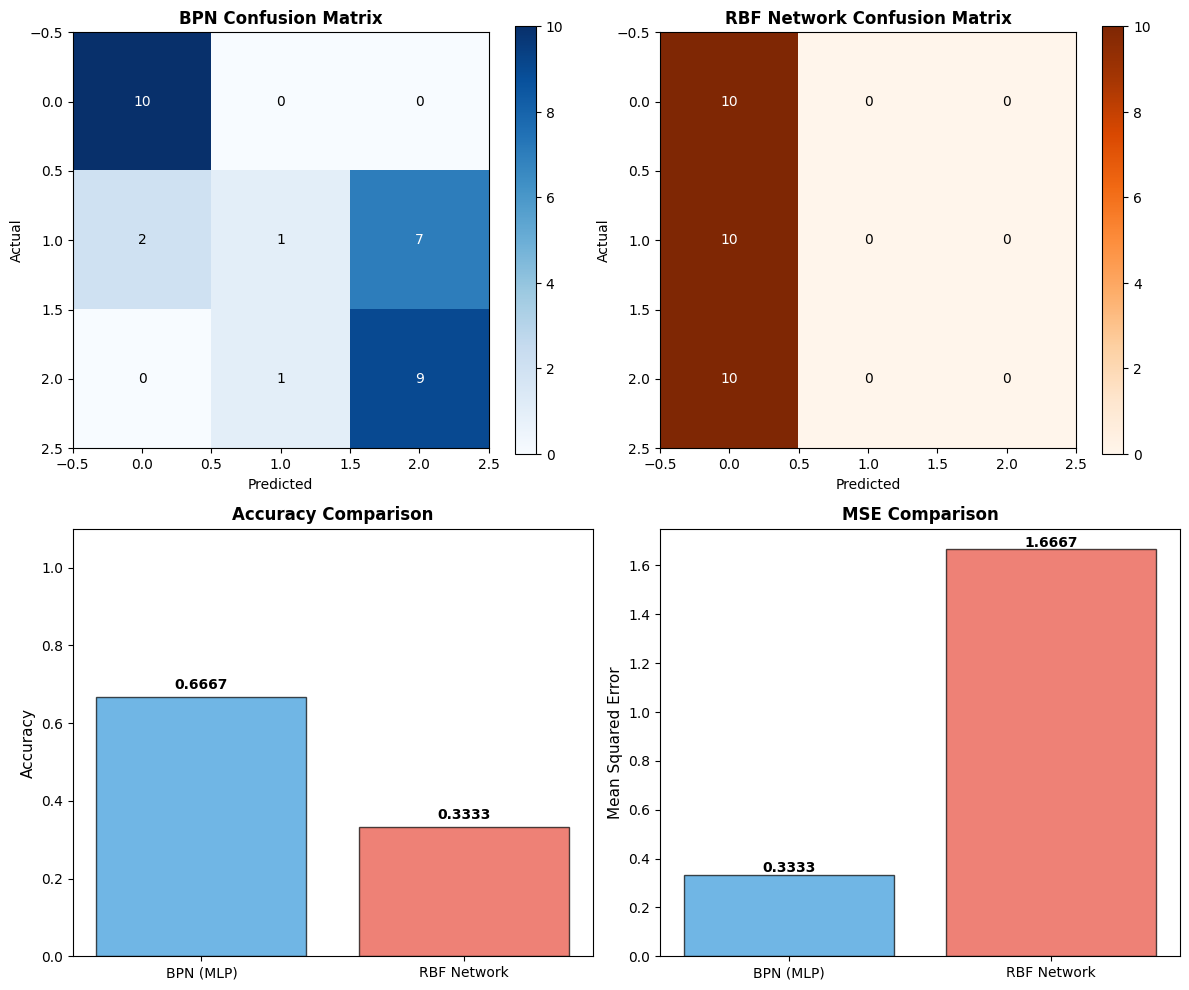

Visualization complete!


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

cm_bpn = confusion_matrix(y_test, y_pred_bpn)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

im1 = axes[0, 0].imshow(cm_bpn, cmap='Blues', interpolation='nearest')
axes[0, 0].set_title('BPN Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
for i in range(cm_bpn.shape[0]):
    for j in range(cm_bpn.shape[1]):
        axes[0, 0].text(j, i, str(cm_bpn[i, j]), ha='center', va='center', color='white' if cm_bpn[i, j] > cm_bpn.max()/2 else 'black')
plt.colorbar(im1, ax=axes[0, 0])

im2 = axes[0, 1].imshow(cm_rbf, cmap='Oranges', interpolation='nearest')
axes[0, 1].set_title('RBF Network Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')
for i in range(cm_rbf.shape[0]):
    for j in range(cm_rbf.shape[1]):
        axes[0, 1].text(j, i, str(cm_rbf[i, j]), ha='center', va='center', color='white' if cm_rbf[i, j] > cm_rbf.max()/2 else 'black')
plt.colorbar(im2, ax=axes[0, 1])

models = ['BPN (MLP)', 'RBF Network']
accuracies = [bpn_accuracy, rbf_accuracy]
colors = ['#3498db', '#e74c3c']
axes[1, 0].bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Accuracy', fontsize=11)
axes[1, 0].set_title('Accuracy Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_ylim([0, 1.1])
for i, v in enumerate(accuracies):
    axes[1, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

mses = [bpn_mse, rbf_mse]
axes[1, 1].bar(models, mses, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Mean Squared Error', fontsize=11)
axes[1, 1].set_title('MSE Comparison', fontsize=12, fontweight='bold')
for i, v in enumerate(mses):
    axes[1, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Visualization complete!")